## step 1: import the libraries

In [4]:
# !pip install seaborn

In [5]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## step 2: load the dataset and convert into dataframes

In [16]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [11]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [14]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


## step3: cleaning the data

In [15]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
gold_data.drop('Date',axis=1,inplace=True)

In [20]:
# finding the correlation
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

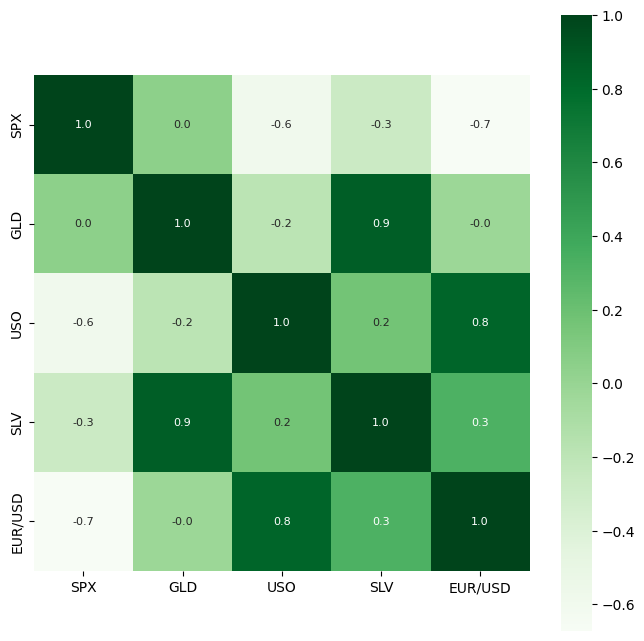

In [22]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Greens')

In [23]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\dhara\AppData\Local\Temp\ipykernel_14396\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

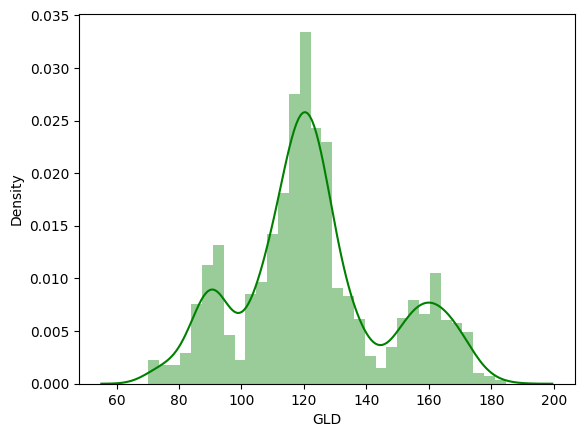

In [25]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

## step4: splitting the features and target

In [30]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# step5: Spliting into Training data and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [34]:
X_train

,SPX,USO,SLV,EUR/USD
66,1360.550049,88.180000,17.812000,1.582203
2007,2297.419922,11.540000,16.570000,1.076171
934,1416.510010,40.770000,31.940001,1.336005
155,1003.349976,67.779999,10.590000,1.361804
1677,2086.050049,14.440000,14.820000,1.116096
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [35]:
Y_train

66       91.769997
2007    116.129997
934     164.399994
155      81.989998
1677    107.750000
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1603, dtype: float64

In [36]:
X_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
1048,1454.920044,34.130001,31.930000,1.310788
2143,2496.840088,10.490000,15.910000,1.178606
1583,2101.040039,18.709999,15.530000,1.108205
141,1156.390015,77.500000,11.900000,1.430492


In [37]:
Y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
1048    169.419998
2143    123.139999
1583    115.000000
141      85.459999
1719    110.750000
Name: GLD, Length: 687, dtype: float64

# step6: Train the model

In [38]:
regressor = RandomForestRegressor(n_estimators=100)
regressor

RandomForestRegressor()

In [46]:
# training the model using RandomForest
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [49]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.84769948  82.09889998 116.2910003  127.44880105 120.41400147
 154.64789788 150.57890047 126.04319971 118.18529885 126.10730062
 116.1554009  171.82030058 142.45499942 168.18089831 115.15490012
 117.65950084 137.43870269 170.57680152 159.81530366 164.14639932
 155.08349966 125.53899984 174.05230037 156.83680255 125.08730091
  93.87149945  76.60199978 120.34270016 119.30220068 167.36570073
  88.50279885 125.37560148  91.12650065 117.80669989 121.12369938
 137.36000087 115.56850073 117.06030058 148.27859956 107.66560092
 103.81390205  87.09159776 126.62380026 117.58169926 152.73319868
 119.84250022 108.24420076 108.40469833  93.19110022 127.1645974
  74.5532004  113.64869949 120.84699959 111.15309892 118.90619913
 120.32539964 158.63180078 167.32470156 146.73009673  86.43620006
  94.38779984  86.87689873  90.56850047 118.91750094 126.37850081
 127.69829979 168.52489955 122.20729948 117.50019907  98.77429948
 168.11380084 143.03959768 131.71540192 121.21530222 121.96799917
 119.586200

In [42]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898149727401613


In [45]:
# train the model using linear regression
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf

LinearRegression()

In [47]:
# train the model
clf.fit(X_train,Y_train)

LinearRegression()

In [48]:
# prediction on data
test_prediction = clf.predict(X_test)
test_prediction

array([159.45418744,  81.36647706, 113.47341507, 128.50060572,
       126.12745577, 141.32029457, 165.50879755, 124.36182725,
       113.87938196, 122.91558062, 113.87904354, 174.95424223,
       132.64686836, 159.25357979, 118.81884711, 122.06472047,
       150.38166241, 161.26591291, 152.27223146, 162.21731306,
       145.86304934, 118.03209693, 180.27571608, 178.15530371,
       123.39918646,  98.86992773,  76.54513324, 119.33651653,
       113.79540713, 159.26674329,  93.82933672, 119.95753559,
        88.42239002, 114.26627059, 112.80395948, 144.20720365,
       118.71880679, 115.83286615, 144.07082067, 113.76079787,
       100.52711017,  89.2564381 , 120.26625212, 110.50178206,
       146.49200536, 119.25602002, 110.97351498, 111.30022589,
        96.34626168, 123.32770175,  79.54257322, 115.29285939,
       121.73976159, 114.50634739, 120.82677882, 117.07140437,
       152.30066376, 182.80740675, 196.74240277,  90.92250411,
       101.8092917 ,  87.30570094,  94.40999581, 119.06

In [50]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.8742729610724103


# Conclusion: by comparing all 2 models, RF is giving good accuracy, so i prefer RF

In [ ]:
# Compare the Actual Values and Predicted Values in a Plot

In [43]:
Y_test = list(Y_test)

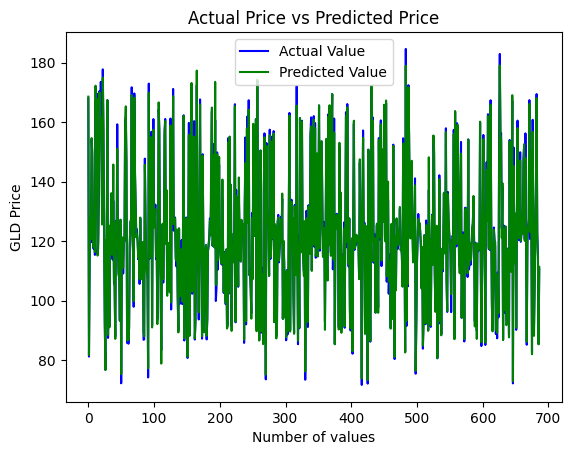

In [44]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()